# Data Reading and Preprocessing

In [ ]:
# Load necessary libraries
library(readr)    # For reading CSV files
library(ggplot2)  # For plotting (equivalent to matplotlib and seaborn)

# Read the CSV file
salary_data <- read_csv('/content/Salary_Data.csv', show_col_types = FALSE)

# Display the first few rows of the data
head(salary_data)

summary(salary_data)

Age,Gender,Education Level,Job Title,Years of Experience,Salary
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
32,Male,Bachelor's,Software Engineer,5,90000
28,Female,Master's,Data Analyst,3,65000
45,Male,PhD,Senior Manager,15,150000
36,Female,Bachelor's,Sales Associate,7,60000
52,Male,Master's,Director,20,200000
29,Male,Bachelor's,Marketing Analyst,2,55000


      Age           Gender          Education Level     Job Title        
 Min.   :21.00   Length:6704        Length:6704        Length:6704       
 1st Qu.:28.00   Class :character   Class :character   Class :character  
 Median :32.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :33.62                                                           
 3rd Qu.:38.00                                                           
 Max.   :62.00                                                           
 NA's   :2                                                               
 Years of Experience     Salary      
 Min.   : 0.000      Min.   :   350  
 1st Qu.: 3.000      1st Qu.: 70000  
 Median : 7.000      Median :115000  
 Mean   : 8.095      Mean   :115327  
 3rd Qu.:12.000      3rd Qu.:160000  
 Max.   :34.000      Max.   :250000  
 NA's   :3           NA's   :5       

# Data Cleaning

In [ ]:
# View the structure of the data
cat("Structure of Data\n")
str(salary_data)

# Filter rows with missing values
missing_rows <- salary_data[!complete.cases(salary_data), ]
cat("Missing Rows\n")
print(missing_rows)

# Remove rows with missing values
salary_data <- na.omit(salary_data)

Structure of Data
spc_tbl_ [6,704 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age                : num [1:6704] 32 28 45 36 52 29 42 31 26 38 ...
 $ Gender             : chr [1:6704] "Male" "Female" "Male" "Female" ...
 $ Education Level    : chr [1:6704] "Bachelor's" "Master's" "PhD" "Bachelor's" ...
 $ Job Title          : chr [1:6704] "Software Engineer" "Data Analyst" "Senior Manager" "Sales Associate" ...
 $ Years of Experience: num [1:6704] 5 3 15 7 20 2 12 4 1 10 ...
 $ Salary             : num [1:6704] 90000 65000 150000 60000 200000 55000 120000 80000 45000 110000 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   Gender = col_character(),
  ..   `Education Level` = col_character(),
  ..   `Job Title` = col_character(),
  ..   `Years of Experience` = col_double(),
  ..   Salary = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
Missing Rows
# A tibble: 6 × 6
    Age Gender `Education Level` `Job Title`        `Years of Experience` Salary
  <dbl> 

## Inconsistent Values

In [ ]:
table(salary_data$`Education Level`)


       Bachelor's Bachelor's Degree       High School          Master's 
              756              2265               448               288 
  Master's Degree               phD               PhD 
             1572                 1              1368 

We found that different values (e.g. PhD and phD) were used to refer to the same degree in the 'Education Level' column. So make them consistent.

In [ ]:
# Define the UnifyEducationLevel function
UnifyEducationLevel <- function(s) {
  for (e in c("Bachelor", "Master", "PhD")) {
    if (grepl(tolower(e), tolower(s))) {
      return(e)
    }
  }
  return(s)
}

# Apply the function to standardize the 'Education Level' column
salary_data$`Education Level` <- sapply(salary_data$`Education Level`, UnifyEducationLevel)

# Count the occurrences of each unique value
table(salary_data$`Education Level`)


   Bachelor High School      Master         PhD 
       3021         448        1860        1369 

## Duplicate Entries

In [ ]:
library(dplyr)

# Count duplicates (efficient)
sum(duplicated(salary_data))

# Group by the specific columns and count the number of occurrences
pivot_df <- salary_data %>%
  group_by(Age, Gender, `Education Level`, `Job Title`, `Years of Experience`, Salary) %>%
  summarise(Freq = n(), .groups = 'drop') %>%
  arrange(desc(Freq))  # Sort by frequency in descending order

# Get the top 10 most frequent combinations
top_10_combinations <- head(pivot_df, 10)

# Display the result
print(top_10_combinations)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 4912

# A tibble: 10 × 7
     Age Gender `Education Level` `Job Title` `Years of Experience` Salary  Freq
   <dbl> <chr>  <chr>             <chr>                       <dbl>  <dbl> <int>
 1    24 Female High School       Receptioni…                     0  25000    45
 2    27 Male   Bachelor          Software E…                     3  80000    45
 3    32 Male   Bachelor          Product Ma…                     7 120000    45
 4    32 Male   Bachelor          Software E…                     8 190000    39
 5    33 Female Master            Product Ma…                    11 198000    38
 6    27 Male   Bachelor          Software E…                     4 140000    37
 7    29 Female Master            Data Scien…                     6 180000    37
 8    25 Male   Bachelor          Product Ma…                     1  60000    36
 9    26 Male   Bachelor          Data Analy…                     3 130000    35
10    29 Male   Bachelor          Marketing …                     4  70000    33


The Freq shows that there are some duplicates. But we didn't remove them because it is possible that two people have same age, gender, education level, etc.

# Who Participated in the Survey ?

In [ ]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




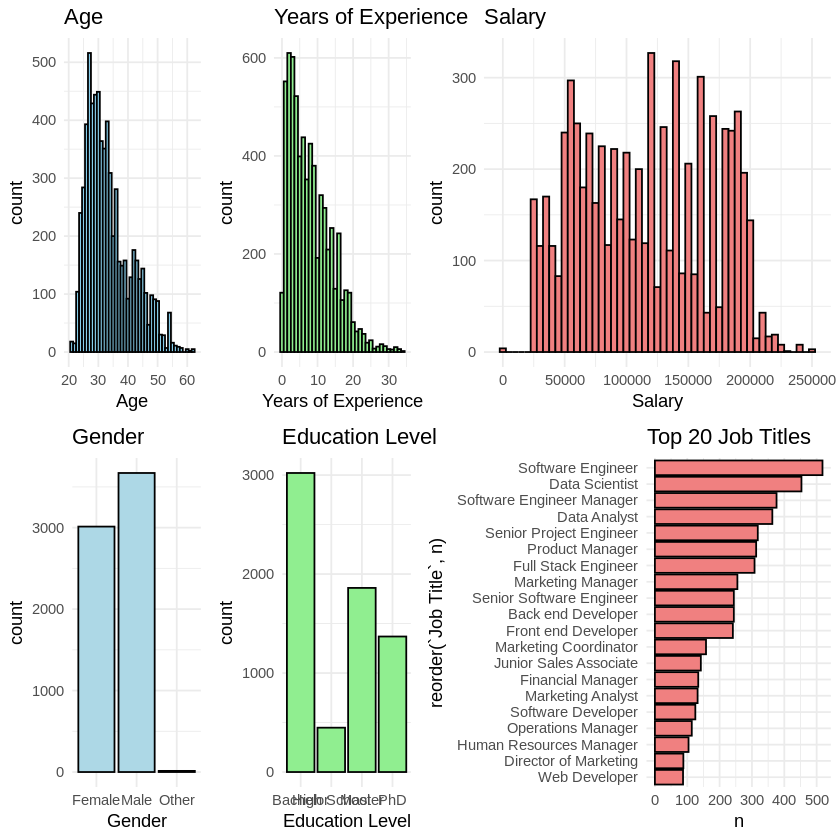

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Ensure data types are correct
salary_data$Age <- as.integer(salary_data$Age)
salary_data$`Years of Experience` <- as.integer(salary_data$`Years of Experience`)

# Create a 2x3 grid of plots using gridExtra
library(gridExtra)

# Create individual plots
p1 <- ggplot(salary_data, aes(x = Age)) +
  geom_histogram(binwidth = 1, fill = 'skyblue', color = 'black') +
  ggtitle('Age') +
  theme_minimal()

p2 <- ggplot(salary_data, aes(x = `Years of Experience`)) +
  geom_histogram(binwidth = 1, fill = 'lightgreen', color = 'black') +
  ggtitle('Years of Experience') +
  theme_minimal()

p3 <- ggplot(salary_data, aes(x = Salary)) +
  geom_histogram(binwidth = 5000, fill = 'lightcoral', color = 'black') +
  ggtitle('Salary') +
  theme_minimal()

p4 <- ggplot(salary_data, aes(x = Gender)) +
  geom_bar(fill = 'lightblue', color = 'black') +
  ggtitle('Gender') +
  theme_minimal()

p5 <- ggplot(salary_data, aes(x = `Education Level`)) +
  geom_bar(fill = 'lightgreen', color = 'black') +
  ggtitle('Education Level') +
  theme_minimal()

# Top 20 Job Titles by frequency
top_job_titles <- salary_data %>%
  count(`Job Title`) %>%
  arrange(desc(n)) %>%
  head(20)

p6 <- ggplot(top_job_titles, aes(x = reorder(`Job Title`, n), y = n)) +
  geom_bar(stat = 'identity', fill = 'lightcoral', color = 'black') +
  coord_flip() +
  ggtitle('Top 20 Job Titles') +
  theme_minimal()

# Arrange the plots in a 2x3 grid with adjusted column widths
grid.arrange(p1, p2, p3, p4, p5, p6,
             nrow = 2,
             ncol = 3,
             widths = c(1, 1, 2))  # Increase width of the third column (for Job Titles)

### Analysis :

- Most participants are young (aged 25 to 35).
- Most Salary offered is between 50000 and 200000.
- Number of Male participants were more than number of Female participants.
- People with Bachelor's Degree are roughly 45% and 30% have Master's degree.
- The top 3 popular job titles are software engineer, data scientist, and software engineer manager.
- The Survey focused more on IT industry.

# Relationship between Salary and Other Factors

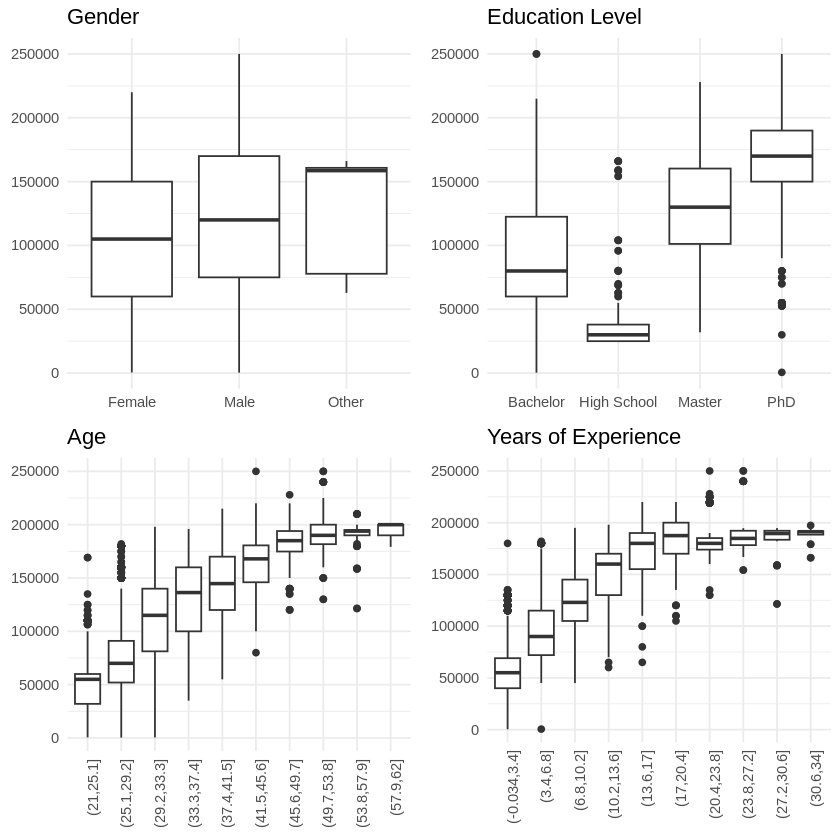

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(gridExtra)
library(grid)

# Create individual plots

# Gender vs Salary (no changes needed)
g1 <- ggplot(salary_data, aes(x = Gender, y = Salary)) +
  geom_boxplot() +
  ggtitle("Gender") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank())

# Education Level vs Salary (no changes needed)
g2 <- ggplot(salary_data, aes(x = `Education Level`, y = Salary)) +
  geom_boxplot() +
  ggtitle("Education Level") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank())

# Age vs Salary (grouping Age into bins)
g3 <- ggplot(salary_data, aes(x = cut(Age, breaks = 10), y = Salary)) +  # Use 'cut' to bin Age
  geom_boxplot() +
  ggtitle("Age") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank()) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Years of Experience vs Salary (grouping YoE into bins)
g4 <- ggplot(salary_data, aes(x = cut(`Years of Experience`, breaks = 10), y = Salary)) +  # Use 'cut' to bin Years of Experience
  geom_boxplot() +
  ggtitle("Years of Experience") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank()) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Arrange the plots in a 2x2 grid
grid.arrange(g1, g2, g3, g4, nrow = 2, ncol = 2)

# Add a title for the entire plot using grid.text()
grid.text("Relationship between a single factor and salary", gp = gpar(fontsize = 16), x = 0.5, y = 1.05)


Factors : Gender, Education Level, Age, Years of Experience

Observations:
- The salary of male participants is a little bit higher than that of female.
- The salary of participants with a higher degree is higher. (Phd > Master > Bachelor > High School)
- The salary roughly increases as the age and YoE increase.

## Most Popular Jobs and their Salary Ranges

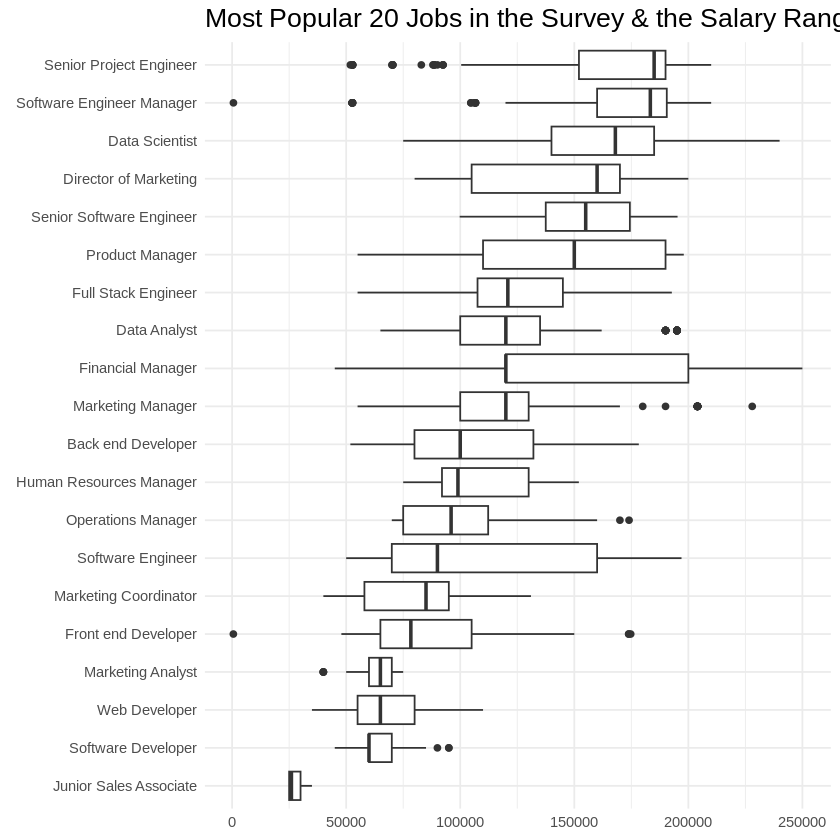

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Set the number of top popular jobs you want to analyze
num_pop_jobs <- 20

# Get the top 20 most popular jobs
pop_jobs <- salary_data %>%
  count(`Job Title`) %>%
  top_n(num_pop_jobs, n) %>%
  pull(`Job Title`)

# Filter the data to include only the rows corresponding to the popular jobs
pop_jobs_data <- salary_data %>%
  filter(`Job Title` %in% pop_jobs)

# Create the boxplot
ggplot(pop_jobs_data, aes(x = Salary, y = `Job Title`)) +
  geom_boxplot() +
  scale_y_discrete(limits = rev(pop_jobs_data %>%
                                group_by(`Job Title`) %>%
                                summarise(median_salary = median(Salary)) %>%
                                arrange(desc(median_salary)) %>%
                                pull(`Job Title`))) +
  ggtitle(paste("Most Popular", num_pop_jobs, "Jobs in the Survey & the Salary Range")) +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        plot.title = element_text(size = 16))

This plot shows the most popular jobs and the salary range of these jobs in the decreasing order of the median salaries.

The top five highest-paid jobs are:
- senior project engineer
- software engineer manager
- data scientist
- director of marketing
- senior software engineer

The median salaries of the top five jobs are all above 150,000.

## Correlation between Age and Salary

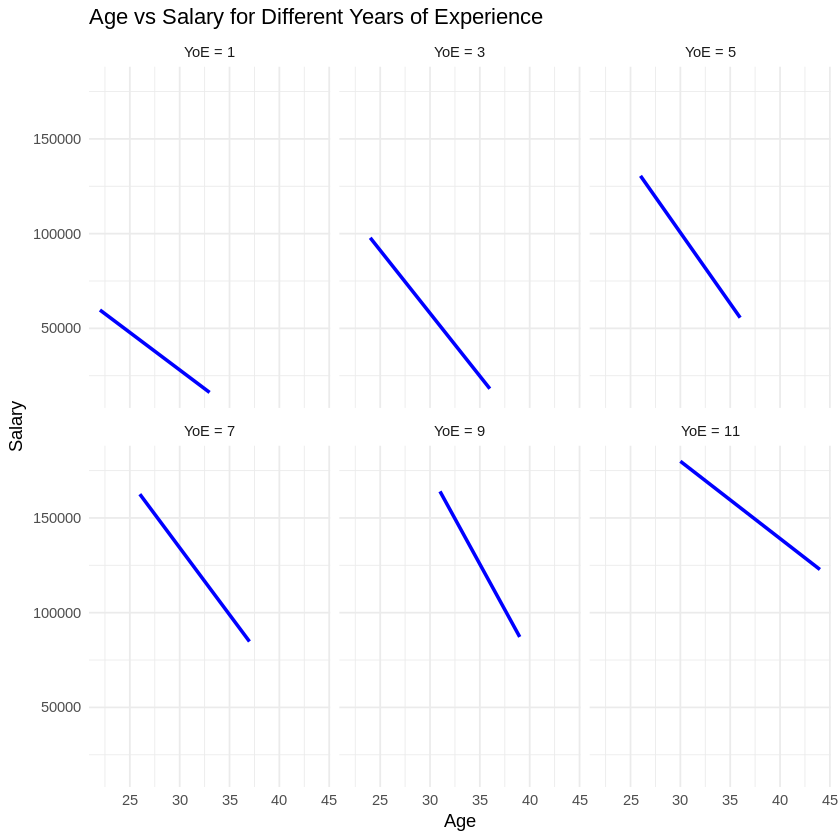

In [ ]:
library(ggplot2)
library(dplyr)

xfactor <- "Age"
yoe_values <- c(1, 3, 5, 7, 9, 11)

# Filter data for the desired YoE values
filtered_data <- salary_data %>% filter(`Years of Experience` %in% yoe_values)

# Create a regression plot using facet_wrap for grid layout
ggplot(filtered_data, aes(x = .data[[xfactor]], y = Salary)) +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue", se = FALSE) +
  facet_wrap(~ `Years of Experience`, labeller = as_labeller(setNames(paste("YoE =", yoe_values), yoe_values))) +
  labs(title = "Age vs Salary for Different Years of Experience", x = "Age", y = "Salary") +
  theme_minimal()


Analysis : •	Older individuals with the same YoE as younger individuals earn less.

# Salary vs. Years of Experience: Gender, Education Level, and Job Titles

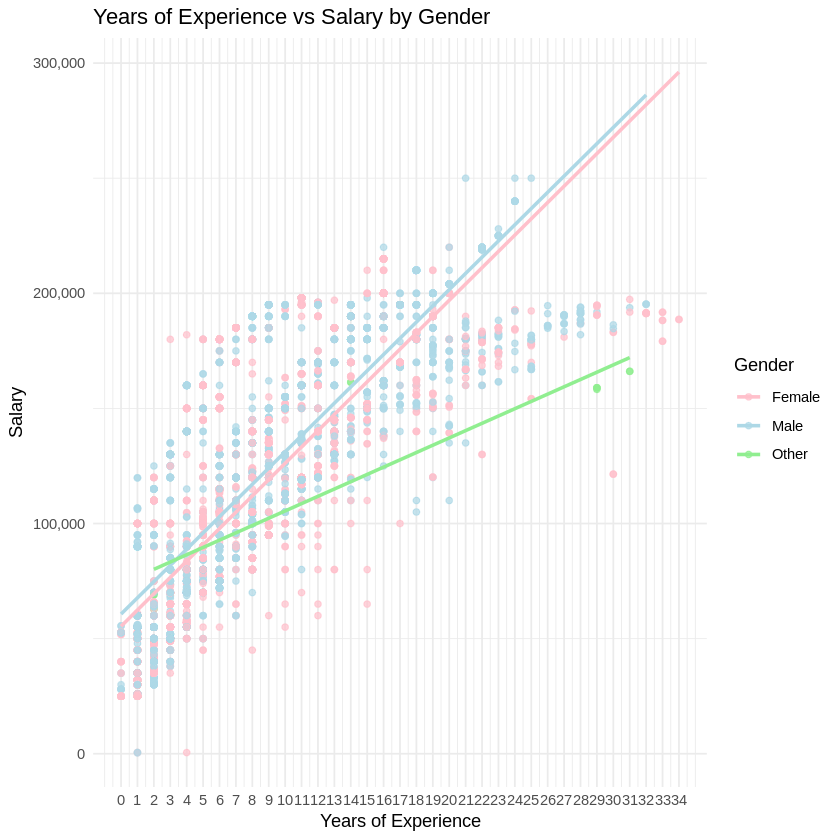

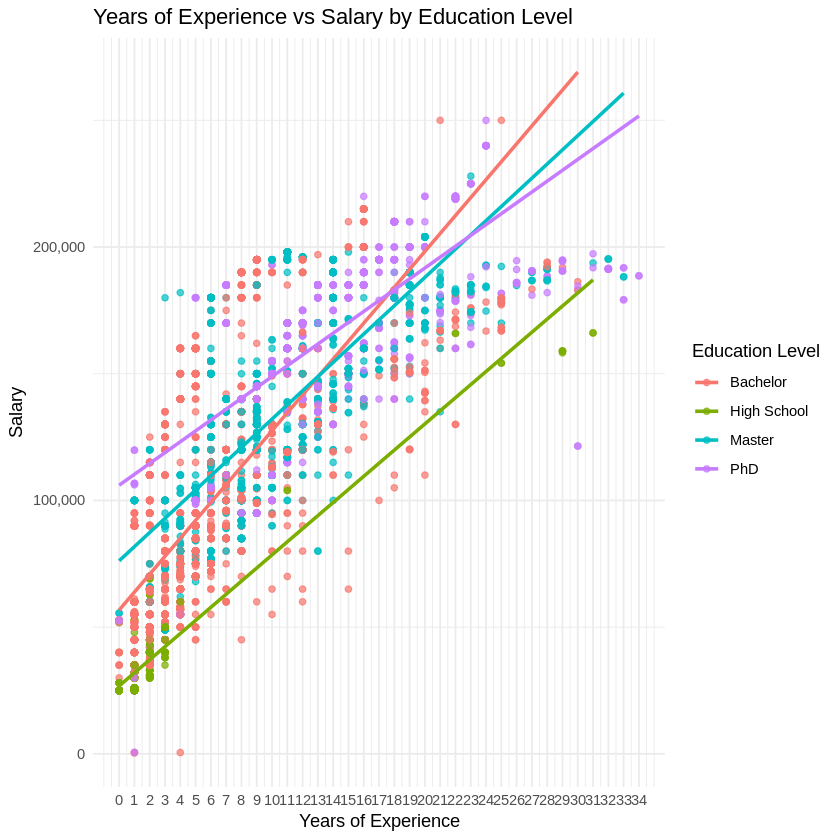

In [ ]:
library(ggplot2)

# Custom palette for Gender
custom_palette <- c("Male" = "lightblue", "Female" = "pink", "Other" = "lightgreen")

# Plot: Years of Experience vs Salary by Gender
ggplot(salary_data, aes(x = `Years of Experience`, y = Salary, color = Gender)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  scale_color_manual(values = custom_palette) +
  scale_x_continuous(breaks = seq(0, max(salary_data$`Years of Experience`, na.rm = TRUE), by = 1)) +  # Ensure zero and all intervals are shown
  scale_y_continuous(labels = scales::comma) +  # Ensure Salary has comma separators (optional)
  labs(title = "Years of Experience vs Salary by Gender",
       x = "Years of Experience",
       y = "Salary",
       color = "Gender") +
  theme_minimal()

# Plot: Years of Experience vs Salary by Education Level
ggplot(salary_data, aes(x = `Years of Experience`, y = Salary, color = `Education Level`)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  scale_x_continuous(breaks = seq(0, max(salary_data$`Years of Experience`, na.rm = TRUE), by = 1)) +  # Ensure zero and all intervals are shown
  scale_y_continuous(labels = scales::comma) +  # Ensure Salary has comma separators (optional)
  labs(title = "Years of Experience vs Salary by Education Level",
       x = "Years of Experience",
       y = "Salary",
       color = "Education Level") +
  theme_minimal()


Analysis:

1. The growth rates of salary for male and female look the same.
2. The growth rates of salary for different education levels are not very different, and the rate of PhD is the lowest.

## YoE vs Salary for Different Job Titles

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


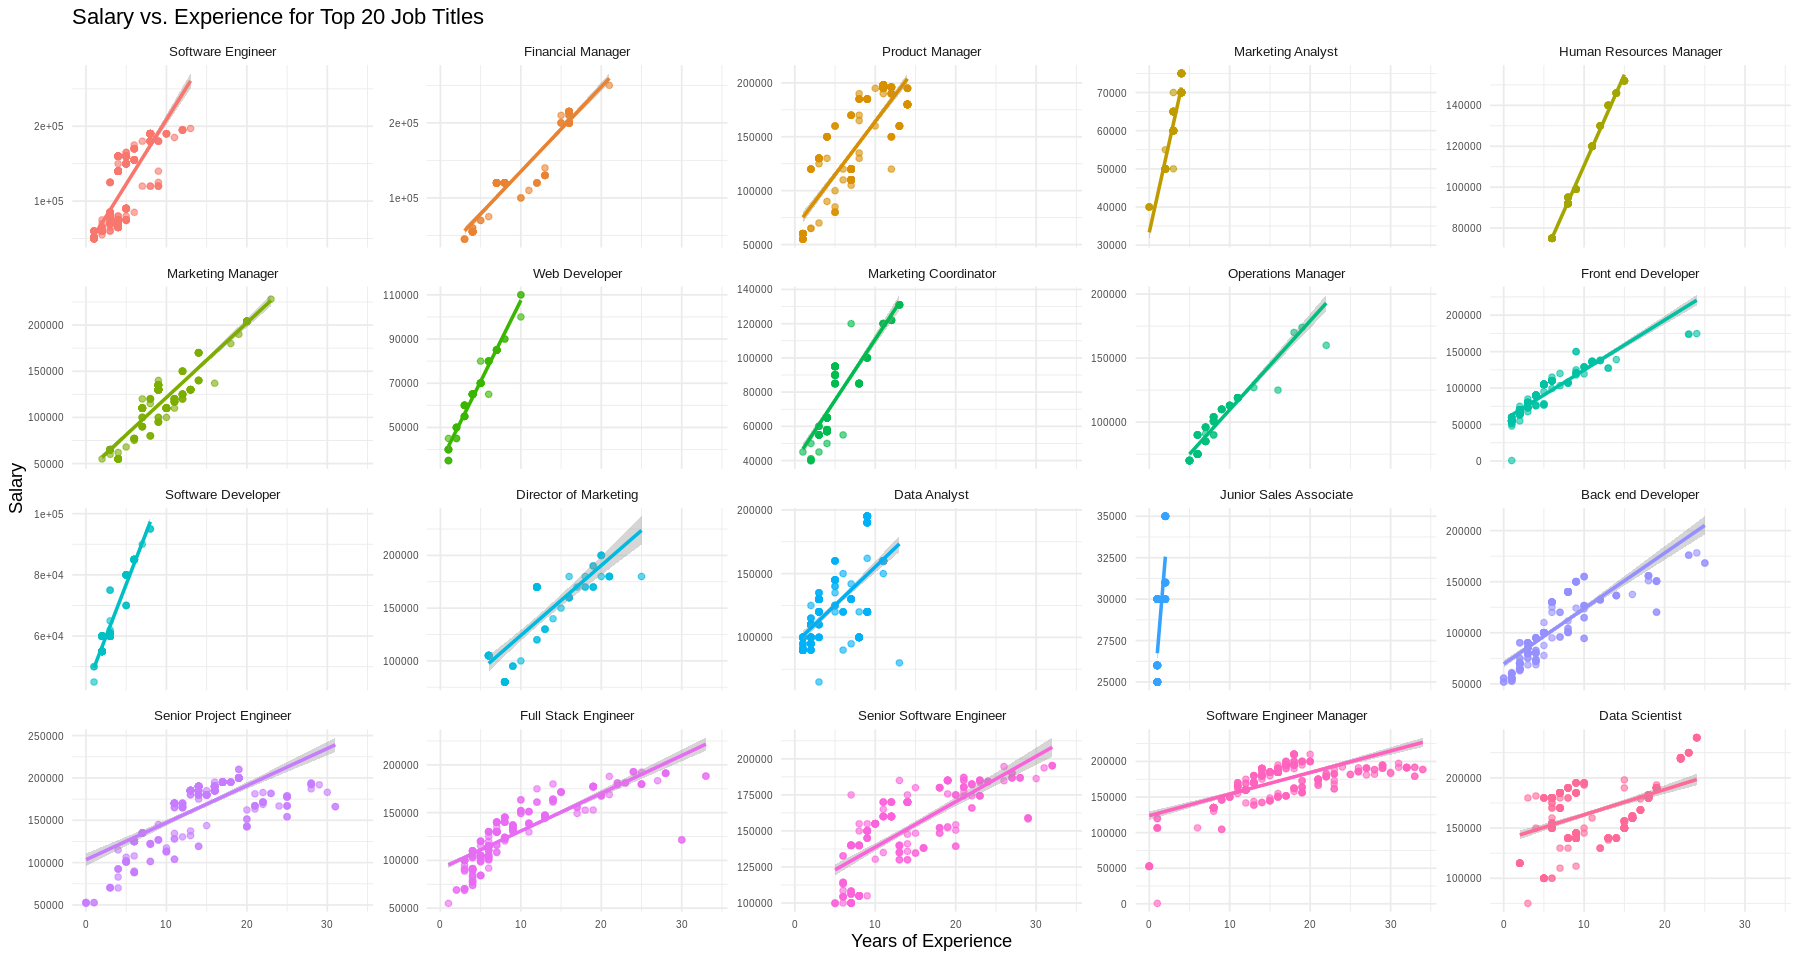

In [ ]:
library(ggplot2)
library(dplyr)

# Number of most common jobs to analyze
num_pop_jobs <- 20

# Get the top 20 most common job titles
pop_jobs <- salary_data %>%
  count(`Job Title`) %>%
  top_n(num_pop_jobs, n) %>%
  pull(`Job Title`)

# Initialize an empty data frame to store slopes and intercepts
job_salary_slopes <- data.frame(JobTitle = character(), Slope = numeric(), Intercept = numeric())

# Calculate the slope and intercept for each job
for (j in pop_jobs) {
  job_data <- salary_data %>% filter(`Job Title` == j)
  model <- lm(Salary ~ `Years of Experience`, data = job_data)
  job_salary_slopes <- rbind(job_salary_slopes, data.frame(JobTitle = j, Slope = coef(model)[2], Intercept = coef(model)[1]))
}

# Sort the job titles by slope (in descending order)
job_salary_slopes <- job_salary_slopes %>%
  arrange(desc(Slope))

# Get the ordered job titles
job_order <- job_salary_slopes$JobTitle

# Filter the salary data for the most common jobs
pop_jobs_data <- pop_jobs_data %>%
  mutate(`Job Title` = factor(`Job Title`, levels = job_salary_slopes$JobTitle))


# Increase the width of the plot (adjusting for wider aspect ratio)
options(repr.plot.width = 15, repr.plot.height = 8)  # Set custom width and height for better display

# Plot the data using ggplot2
ggplot(pop_jobs_data, aes(x = `Years of Experience`, y = Salary, color = `Job Title`)) +
  geom_point(alpha = 0.6, size = 1.5) +  # Add scatter points with transparency
  geom_smooth(method = "lm", se = TRUE, size = 1) +  # Add regression line with shaded confidence interval
  facet_wrap(~ `Job Title`, ncol = 5, scales = "free_y") +  # Use 5 columns to spread the plots horizontally
  scale_x_continuous() +
  scale_y_continuous() +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 8),
    axis.text = element_text(size = 6),
    legend.position = "none",
    panel.spacing = unit(0.5, "lines")
  ) +
  labs(
    title = "Salary vs. Experience for Top 20 Job Titles",
    x = "Years of Experience",
    y = "Salary"
  )


Analysis:

- The top three jobs with the highest growth rates are: software engineer, financial manager, and product manager.
- The bottom three jobs with the lowest growth rates are: senior software engineer, software engineer manager, and data scientist. (Note that they are among the top five highest-paid jobs in the previous analysis.)

# Looking into Genders

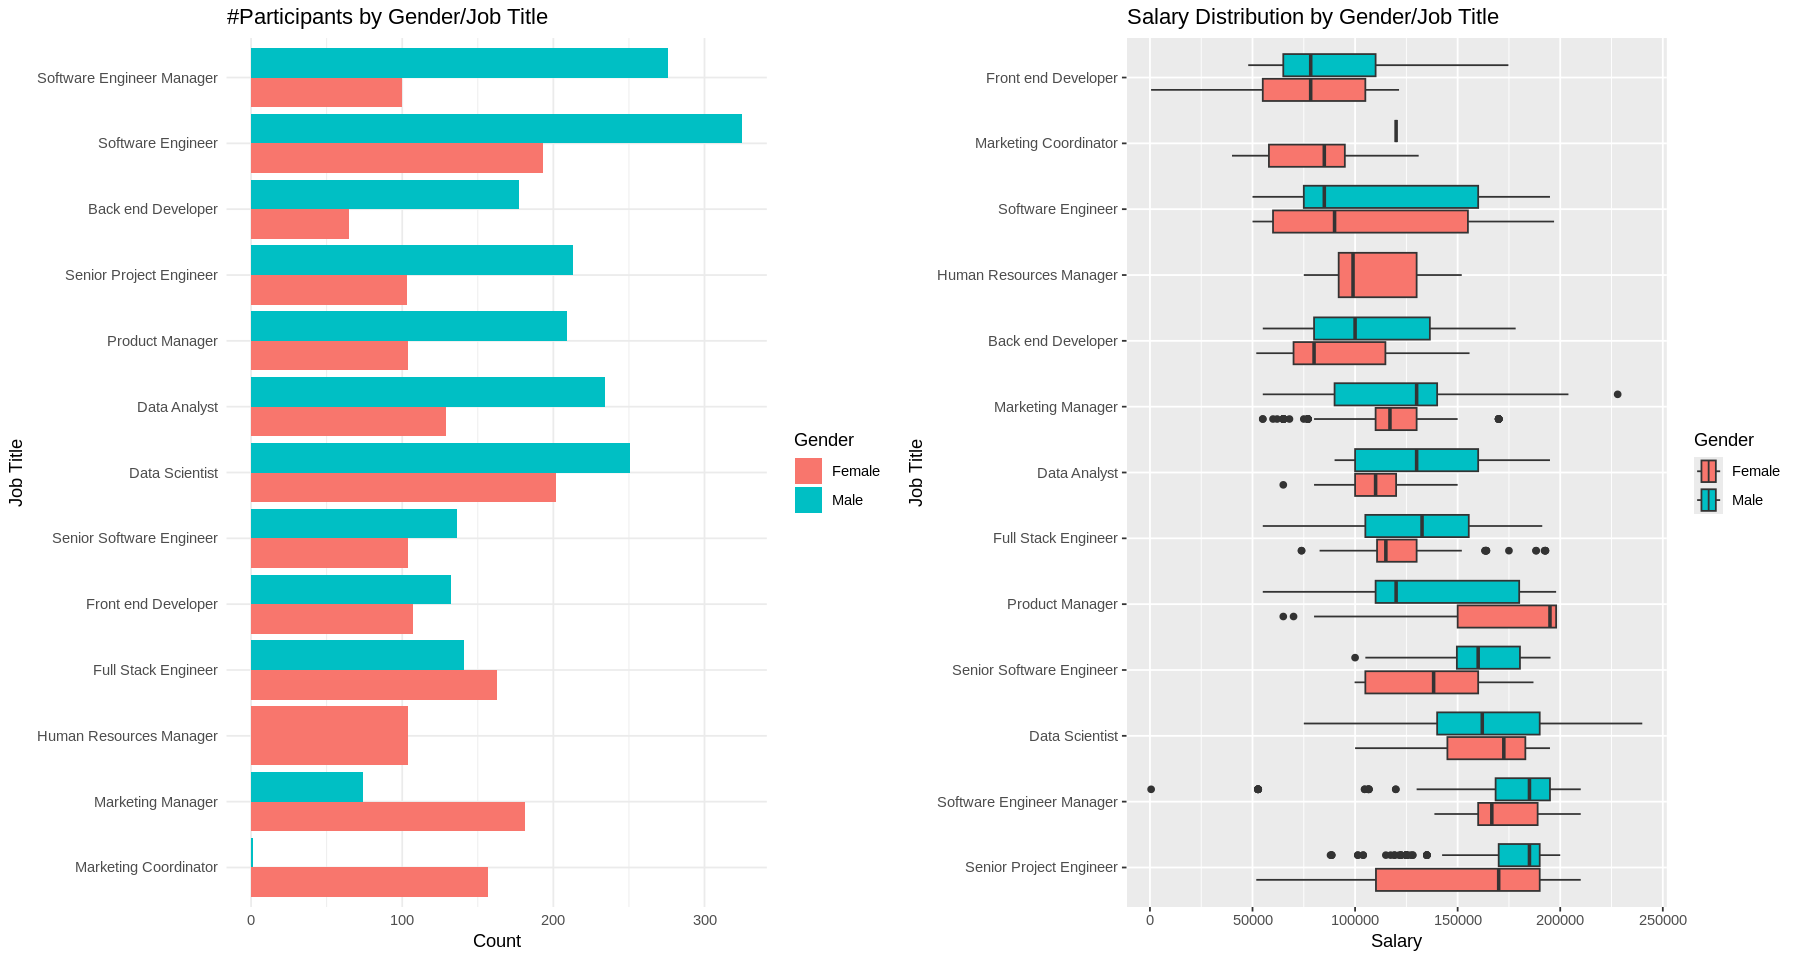

In [ ]:
# Filter only for "Male" and "Female" genders
filtered_salary_data <- salary_data %>%
  filter(Gender %in% c("Male", "Female"))

# Find the top 10 most popular jobs for both male and female
male_pop_jobs <- filtered_salary_data %>%
  filter(Gender == "Male") %>%
  count(`Job Title`, sort = TRUE) %>%
  head(10) %>%
  pull(`Job Title`)

female_pop_jobs <- filtered_salary_data %>%
  filter(Gender == "Female") %>%
  count(`Job Title`, sort = TRUE) %>%
  head(10) %>%
  pull(`Job Title`)

# Combine unique job titles from both male and female popular jobs
popular_jobs <- union(male_pop_jobs, female_pop_jobs)

# Calculate the participant difference between male and female for each job title
job_count_diff <- filtered_salary_data %>%
  filter(`Job Title` %in% popular_jobs) %>%
  group_by(`Job Title`) %>%
  summarise(Difference = sum(Gender == "Male") - sum(Gender == "Female")) %>%
  arrange(Difference)

# Plot 1: Bar chart for the number of participants by gender and job title
both_pop_jobs_data <- filtered_salary_data %>%
  filter(`Job Title` %in% popular_jobs)

plot1 <- ggplot(both_pop_jobs_data, aes(y = `Job Title`, fill = Gender)) +
  geom_bar(position = "dodge") +
  scale_y_discrete(limits = job_count_diff$`Job Title`) +
  labs(title = "#Participants by Gender/Job Title", y = "Job Title", x = "Count") +
  theme_minimal()

# -------------

# Calculate median salaries to sort job titles by salary
high_pay_jobs <- both_pop_jobs_data %>%
  group_by(`Job Title`) %>%
  summarise(MedianSalary = median(Salary, na.rm = TRUE)) %>%
  arrange(desc(MedianSalary)) %>%
  pull(`Job Title`)

# Plot 2: Box plot for salary distribution by gender and job title
plot2 <- ggplot(both_pop_jobs_data, aes(y = `Job Title`, x = Salary, fill = Gender)) +
  geom_boxplot() +
  scale_y_discrete(limits = high_pay_jobs) +
  labs(title = "Salary Distribution by Gender/Job Title", y = "Job Title", x = "Salary")

grid.arrange(plot1, plot2, nrow = 1)


## Plot with integrated YoE

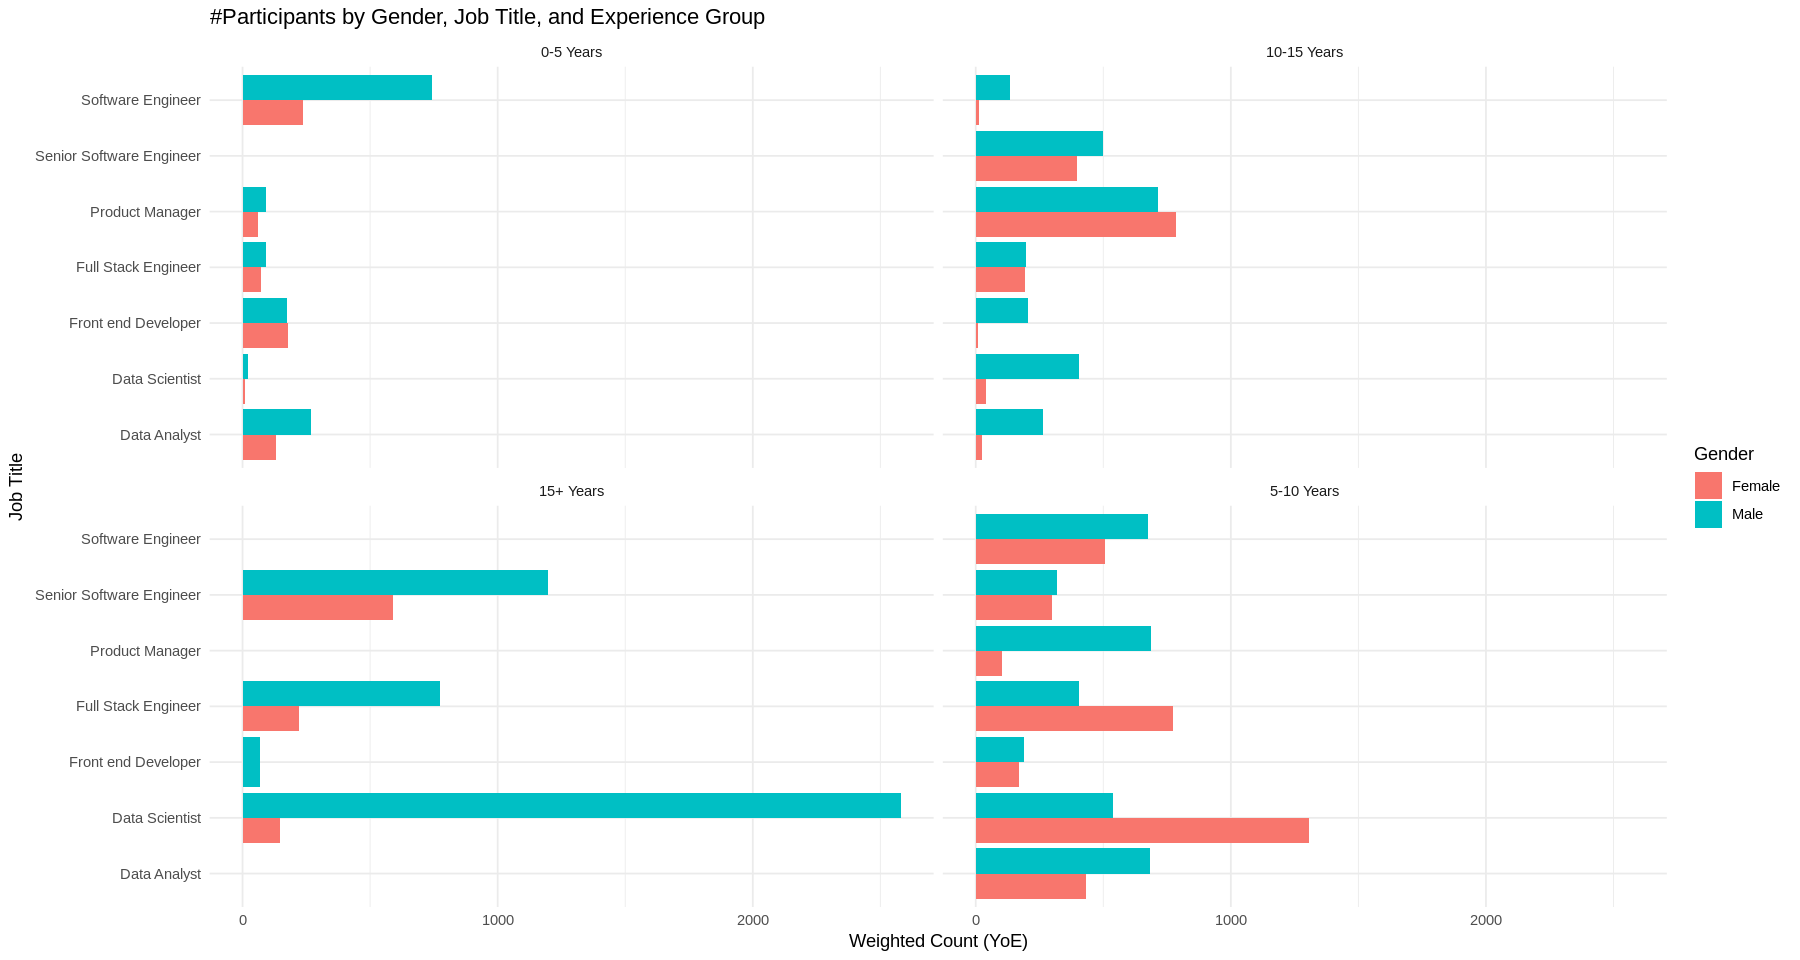

In [ ]:
library(ggplot2)
library(dplyr)
library(gridExtra)

# Create Experience Groups
filtered_salary_data <- salary_data %>%
  filter(Gender %in% c("Male", "Female")) %>%
  mutate(Experience_Group = case_when(
    `Years of Experience` < 5 ~ "0-5 Years",
    `Years of Experience` < 10 ~ "5-10 Years",
    `Years of Experience` < 15 ~ "10-15 Years",
    TRUE ~ "15+ Years"
  ))

# Find the top 10 most popular jobs for both male and female
male_pop_jobs <- filtered_salary_data %>%
  filter(Gender == "Male") %>%
  count(`Job Title`, sort = TRUE) %>%
  head(10) %>%
  pull(`Job Title`)

female_pop_jobs <- filtered_salary_data %>%
  filter(Gender == "Female") %>%
  count(`Job Title`, sort = TRUE) %>%
  head(10) %>%
  pull(`Job Title`)

# Find common job titles in both male and female popular lists
popular_jobs_both_genders <- intersect(male_pop_jobs, female_pop_jobs)

# Filter data for only the common popular jobs
both_pop_jobs_data <- filtered_salary_data %>%
  filter(`Job Title` %in% popular_jobs_both_genders)

# --------------------------
# Plot 1: Participants by Gender, Job Title, and Experience Group
# --------------------------
plot1 <- ggplot(both_pop_jobs_data, aes(y = `Job Title`, fill = Gender)) +
  geom_bar(position = "dodge", aes(weight = `Years of Experience`)) +
  facet_wrap(~ Experience_Group, ncol = 2) +
  labs(title = "#Participants by Gender, Job Title, and Experience Group",
       y = "Job Title",
       x = "Weighted Count (YoE)") +
  theme_minimal()

# --------------------------
# Arrange the Plots
# --------------------------
grid.arrange(plot1, nrow = 1)
